In [1]:
import APEX as ap
import pyccl as ccl
import numpy as np

cosmo = ccl.Cosmology(
    Omega_c=0.261,
    Omega_b=0.049,
    h=0.677,
    n_s=0.9665,
    sigma8=0.8102,
    transfer_function="bbks",
    matter_power_spectrum="halofit")


In [2]:
gdwsp = ap.GalaxyDensityTracerWorkspace(
    sacc_file="../CIB-Project/hsc_x_cib(857).fits",
    tracer_name_root="hsc_zbin",
    max_index=3,
    cosmology=cosmo
)

cibwsp = ap.CIBIntensityTracerWorkspace(
    flux_fits_file="../CIB-Project/filtered_snu_planck.fits",
    cosmology=cosmo,
    tracer_name_root="CIBLenz__",
    single_index=3
)

tracer_combos = [('hsc_zbin0', 'hsc_zbin0'), 
                 ('hsc_zbin1', 'hsc_zbin1'),
                 ('hsc_zbin2', 'hsc_zbin2'),
                 ('hsc_zbin3', 'hsc_zbin3'),
                 ('hsc_zbin0', 'CIBLenz__3'),
                 ('hsc_zbin1', 'CIBLenz__3'),
                 ('hsc_zbin2', 'CIBLenz__3'),
                 ('hsc_zbin3', 'CIBLenz__3')]

s = ap.SaccWorkspace('../CIB-Project/hsc_x_cib(857).fits', tracer_combinations=tracer_combos)

s.define_alias('cib_857GHz', 'CIBLenz__3')



{'CIBLenz__3': 'cib_857GHz'}


In [3]:
mmodel = ap.MaleubreModel(
    Tracer1Workspace=gdwsp,
    Tracer2Workspace=cibwsp,
    tracer_combos=tracer_combos,
    sacc_workspace=s,
    cosmology=cosmo,
    logged_N=True
)

In [8]:
mcmc = ap.MCMCWorkspace(
    sacc_file='../CIB-Project/hsc_x_cib(857).fits',
    model=mmodel,
    likelihood_function='log_likelihood_function',

)

params = ['b_g0', 'b_g1', 'b_g2', 'b_g3',
          'N_gg0', 'N_gg1', 'N_gg2', 'N_gg3',
          'A_gg0', 'A_gg1', 'A_gg2', 'A_gg3',
          'N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3',
          'A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3',
          'bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']

mcmc.set_param_priors(
    params=params,
    priors=[
        (0.75, 5), (0.75, 5), (0.75, 5), (0.75, 5), 
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (-3, 3), (-3, 3), (-3, 3), (-3, 3),
    ]
)

mcmc.set_param_references(
    params=params,
    references=[
        1.1, 1.1, 1.1, 1.1, 
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        0.5, 0.5, 0.5, 0.5,
    ]
)

mcmc.set_param_proposals(
    params=params,
    proposals=[
        0.1, 0.1, 0.1, 0.1, 
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        0.1, 0.1, 0.1, 0.1,
    ]
)

mcmc.set_grouped_params({
    'b_gs': ['b_g0', 'b_g1', 'b_g2', 'b_g3'],
    'N_ggs': ['N_gg0', 'N_gg1', 'N_gg2', 'N_gg3'],
    'A_ggs': ['A_gg0', 'A_gg1', 'A_gg2', 'A_gg3'],
    'N_gnus': ['N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3'],
    'A_gnus': ['A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3'],    
    'bpsfrs': ['bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
})

mcmc.MCMC_config(params)

mcmc.minimize_run()



[<bound method maleubremodel.log_likelihood_function of <apex.maleubremodel object at 0x7f51c8d07e00>>] Initialized external likelihood.
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'b_g1': np.float64(1.1), 'b_g2': np.float64(1.1), 'b_g3': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'N_gg1': np.float64(-8.769551078621726), 'N_gg2': np.float64(-8.769551078621726), 'N_gg3': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'A_gg1': np.float64(7.0), 'A_gg2': np.float64(7.0), 'A_gg3': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'N_gnu1': np.float64(-8.769551078621726), 'N_gnu2': np.float64(-8.769551078621726), 'N_gnu3': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'A_gnu1': np.float64(7.0), 'A_gnu2': np.float64(7.0), 'A_gnu3': np.float64(7.0), 'bpsfr0': np.float64(0.5), 'bpsfr1': np.float64(0.5), 'bpsfr2': np.float64(0.5), 'bpsfr3': np.float64(0.5)}
[minimize] Run 2/2

KeyboardInterrupt: 

In [4]:
modelled = mmodel.get_modelled_data(b_gs = np.array([1.948182, 2.035968, 2.298273, 2.456469]),
    N_ggs = np.array([-11.191655, -3.983871, -14.032556, -0.363131]),
    A_ggs = np.array([36.100385, 53.170345, 60.163963, 35.638479]),
    N_gnus = np.array([-6.021444, -2.913143, -10.627134, -14.951336]),
    A_gnus = np.array([0.499085, 1.034978, 1.817552, 2.186426]),
    bpsfrs = np.array([0.023589, 0.048866, 0.084527, 0.128878]))

In [5]:

measured_data = s.get_c_ells(tracer_combos)

errors = s.get_errors(tracer_combos)

print()


Getting C_ell for tracer combination hsc_zbin0 and hsc_zbin0
Getting C_ell for tracer combination hsc_zbin1 and hsc_zbin1
Getting C_ell for tracer combination hsc_zbin2 and hsc_zbin2
Getting C_ell for tracer combination hsc_zbin3 and hsc_zbin3
Getting C_ell for tracer combination hsc_zbin0 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin1 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin2 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin3 and cib_857GHz



/mnt/users/durrantn/APEX/Plots.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


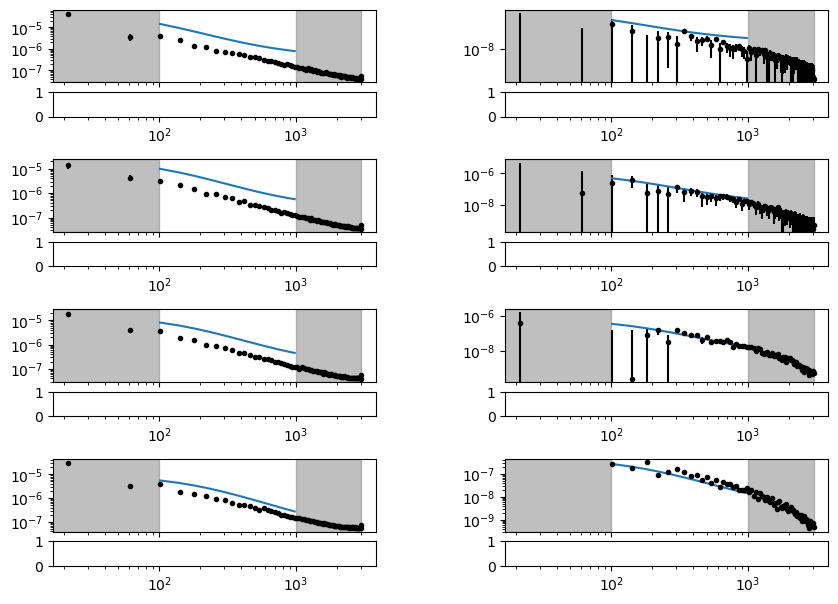

In [6]:
plotter = ap.Plots.Plots(s)

plotter.create_grid_plot(
    subplot_titles=['test1', 'test2'],
    subplot_tracer_combos=tracer_combos,
    measured_data=measured_data,
    measured_data_err=errors,
    modelled_data=modelled,
    cut_positions=[100, 1000],
    residuals=True
)